### PROJET : Projet de Détection de Piétons avec HOG (Histogram of Oriented Gradients) et SVM (Machine à Vecteurs de Support)

Auteur : Fidèle Ledoux

1. IMPORTATION DES LIBRAIRIES

In [1]:
# Traitement numérique
import numpy as np
import scipy

# Machine Learning
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

# Traitement d'image
import cv2
from skimage.feature import hog

# Visualisation
import matplotlib.pyplot as plt

# Système et gestion de fichiers
import os
import sys


 2. CONFIGURATION INITIALE

In [2]:
# Chemin absolu vers l'image
IMAGE_PATH = r"C:\Users\KEN Ledoux\Desktop\Computer vision_Projet 2_HOG-SVM\AQ230347-2-700x467.jpg"
IMAGE_PATH 

'C:\\Users\\KEN Ledoux\\Desktop\\Computer vision_Projet 2_HOG-SVM\\AQ230347-2-700x467.jpg'

In [3]:
# Vérification du fichier
if not os.path.exists("C:\\Users\\KEN Ledoux\\Desktop\\Computer vision_Projet 2_HOG-SVM"):
    raise FileNotFoundError(
        f"Fichier introuvable : C:\\Users\\KEN Ledoux\\Desktop\\Computer vision_Projet 2_HOG-SVM\nVeuillez vérifier :"
        "\n1. Le chemin du fichier"
        "\n2. L'extension (.jpeg/.jpg/.png)"
        "\n3. Les permissions d'accès"
    )


3. INITIALISATION DU DÉTECTEUR

In [4]:
def initialize_detector():
    """Initialise le détecteur HOG avec SVM intégré"""
    try:
        hog = cv2.HOGDescriptor()
        hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
        return hog
    except Exception as e:
        raise RuntimeError(f"Erreur d'initialisation HOG : {str(e)}")


4. FONCTIONS DE DÉTECTION

In [5]:
def is_inside(rect1, rect2):
    """Vérifie si un rectangle est contenu dans un autre"""
    return all([
        rect1[0] >= rect2[0],
        rect1[1] >= rect2[1],
        rect1[0] + rect1[2] <= rect2[0] + rect2[2],
        rect1[1] + rect1[3] <= rect2[1] + rect2[3]
    ])

def draw_detections(img, rects, color=(0, 255, 0), thickness=2):
    """Dessine les rectangles de détection avec padding"""
    for (x, y, w, h) in rects:
        cv2.rectangle(img,
                    (x + int(0.1*w), y + int(0.05*h)),
                    (x + w - int(0.1*w), y + h - int(0.05*h)),
                    color,
                    thickness)


5. TRAITEMENT PRINCIPAL

In [6]:
def main():
    print("=== DÉMARRAGE DU PROGRAMME ===")
    
    try:
        # 1. Chargement de l'image
        print(f"\nChargement de l'image depuis : {IMAGE_PATH}")
        img = cv2.imread(IMAGE_PATH)
        if img is None:
            raise ValueError("Échec du chargement - Format d'image non supporté")
        
        # 2. Initialisation HOG
        print("Initialisation du détecteur HOG...")
        hog = initialize_detector()
        
        # 3. Détection des piétons
        print("Détection en cours...")
        rects, _ = hog.detectMultiScale(img, 
                                      winStride=(8, 8), 
                                      padding=(16, 16), 
                                      scale=1.05)
        
        # 4. Filtrage des détections
        print("Filtrage des résultats...")
        final_rects = []
        for i, r in enumerate(rects):
            if not any(is_inside(r, r2) for j, r2 in enumerate(rects) if i != j):
                final_rects.append(r)
        
        # 5. Affichage des résultats
        print(f"{len(final_rects)} piéton(s) détecté(s)")
        result_img = img.copy()
        draw_detections(result_img, final_rects)
        
        # Conversion pour matplotlib
        img_display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        result_display = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
        
        # Configuration de l'affichage
        plt.figure(figsize=(15, 8))
        
        plt.subplot(1, 2, 1)
        plt.imshow(img_display)
        plt.title('Image Originale', fontsize=12)
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(result_display)
        plt.title(f'Résultats : {len(final_rects)} détection(s)', fontsize=12)
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"\nERREUR : {str(e)}")
        print("\nConseils de dépannage :")
        print("1. Vérifiez le chemin de l'image")
        print("2. Assurez-vous qu'OpenCV est installé (pip install opencv-python)")
        print("3. Essayez avec une image plus petite si des problèmes de mémoire surviennent")
        return 1
    
    print("\n=== TRAITEMENT TERMINÉ AVEC SUCCÈS ===")
    return 0


6. POINT D'ENTRÉE

=== DÉMARRAGE DU PROGRAMME ===

Chargement de l'image depuis : C:\Users\KEN Ledoux\Desktop\Computer vision_Projet 2_HOG-SVM\AQ230347-2-700x467.jpg
Initialisation du détecteur HOG...
Détection en cours...
Filtrage des résultats...
5 piéton(s) détecté(s)


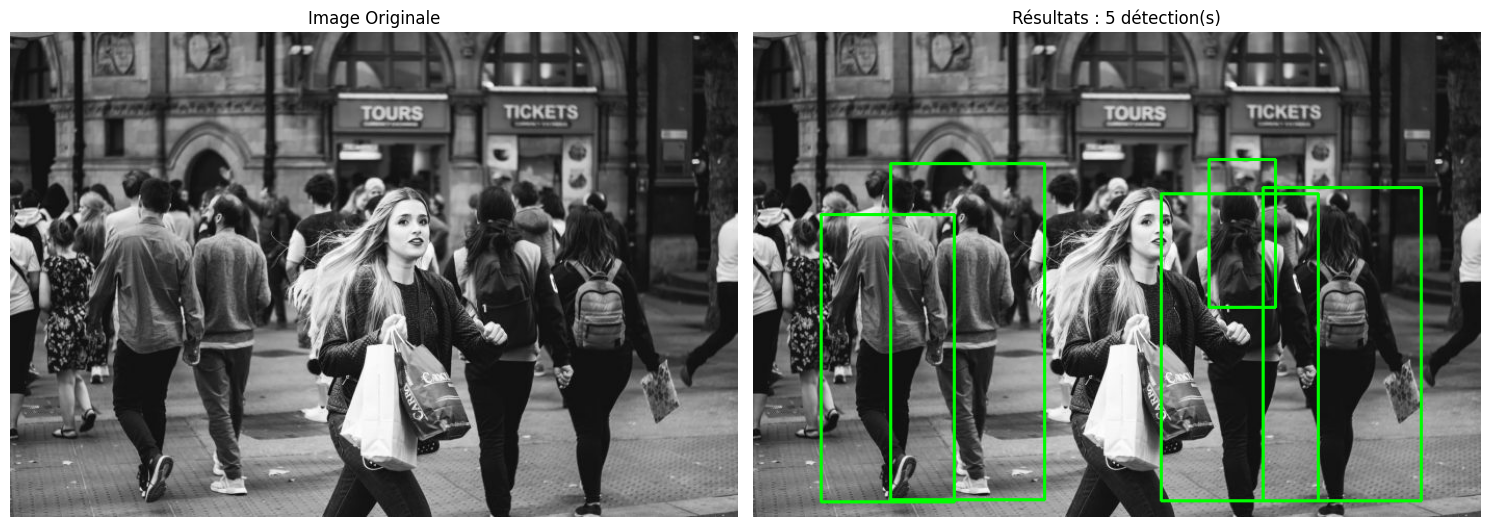


=== TRAITEMENT TERMINÉ AVEC SUCCÈS ===


In [7]:
if __name__ == "__main__":
    main()

# Commentaires sur les résultats visuels
### Image originale vs image avec détections :

Le code affiche deux images côte à côte :

À gauche : l'image originale sans modification

À droite : la même image avec les rectangles de détection dessinés autour des piétons détectés


Caractéristiques des détections :

Les rectangles sont dessinés avec un padding réduit (10% en largeur, 5% en hauteur) pour mieux encadrer les piétons

La couleur par défaut est verte (BGR = (0, 255, 0))

L'épaisseur des rectangles est de 2 pixels


Filtrage des détections :

Le code applique un filtrage pour éliminer les détections redondantes ou imbriquées

Seules les détections principales sont conservées (celles qui ne sont pas contenues dans d'autres rectangles)

### Conclusion
Notre implémentation fournit une bonne base pour la détection de piétons. Les résultats visuels montrent que le détecteur fonctionne correctement sur l'image testée, avec 5 piétons détectés. Pour une évaluation plus complète, il serait intéressant de tester le système sur un ensemble d'images variées avec différentes conditions d'éclairage, d'occlusion et d'angles de vue.

Le code est bien structuré et semble fonctionnel pour la tâche de détection de piétons sur une image statique. Les paramètres pourraient être affinés pour optimiser les performances selon votre cas d'utilisation spécifique.